# **Escenario**
Se proporciona un conjunto de datos con información relevante para abordar este desafío. A continuación, se describen los pasos a seguir para el análisis y modelado:

- **Exploración Inicial de Datos:**

Identificar la cantidad de datos y columnas.
Determinar los tipos de variables presentes (numéricas, categóricas, etc.).

- **Manejo de Datos Faltantes:**

Detectar valores ausentes.
Decidir cómo tratarlos (eliminación, imputación con mediana/media/moda).


- **Exploración y Análisis de Datos:**

Analizar la distribución de variables clave como edad, sueldo, cantidad de beneficios, número de integrantes en el grupo familiar.
Categorizar variables si es necesario (por ejemplo, rangos de edad o sueldo).


- **Correlaciones:**

Evaluar correlaciones entre el número de beneficios y otras variables como sueldo, grupo familiar, género y edad.


- **Preparación de Datos para Modelado:**

Aplicar técnicas de preprocesamiento según el tipo de modelo.
Utilizar los siguientes algoritmos de Machine Learning:
Stochastic Gradient Descent (SGD)
Random Forest
Decision Tree
Gradient Boosting
Logistic Regression


- **Entrenamiento y Evaluación de Modelos:**

Evaluar el rendimiento de los modelos con métricas como F1-score, Recall y Accuracy.
Implementar validación cruzada para evitar sobreajuste.
Analizar la matriz de confusión para interpretar los resultados.

- **Elección de Modelos:**
  
Elegir el mejor modelo 


In [1]:
#Librerías:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

# **Exploración Inicial de Datos:**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AnaHerreraC/Beneficios-Seguros/main/insurance_us.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.describe().round(2)

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.0,5000.00,5000.00,5000.00,5000.00
mean,0.5,30.95,39916.36,1.19,0.15
std,0.5,8.44,9900.08,1.09,0.46
min,0.0,18.00,5300.00,0.00,0.00
25%,0.0,24.00,33300.00,0.00,0.00
50%,0.0,30.00,40200.00,1.00,0.00
75%,1.0,37.00,46600.00,2.00,0.00
max,1.0,65.00,79000.00,6.00,5.00


In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns = data.columns.str.replace(' ', '_')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


# **Exploración Inicial de Datos:**

In [9]:
data.isnull().sum()

gender                0
age                   0
salary                0
family_members        0
insurance_benefits    0
dtype: int64

In [10]:
data.drop_duplicates()

,gender,age,salary,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


# **Exploración de Datos**

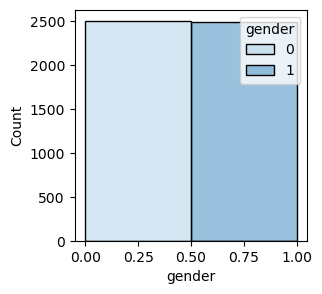

In [11]:
#Género:0 Mujer - 1 Hombre
plt.figure(figsize = (3,3))
sns.histplot(x = 'gender', data = data, hue = 'gender', bins = 2, palette='Blues')
plt.show()

In [12]:
# Age:
data['age_cat'] = pd.cut(data['age'], bins = [18, 25, 35, 45, 55, 65], labels = [25, 35, 45, 55, 65], include_lowest = True)

C:\Users\anahe\AppData\Local\Temp\ipykernel_16748\1620669268.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['age'], kde=True, palette='Blues')


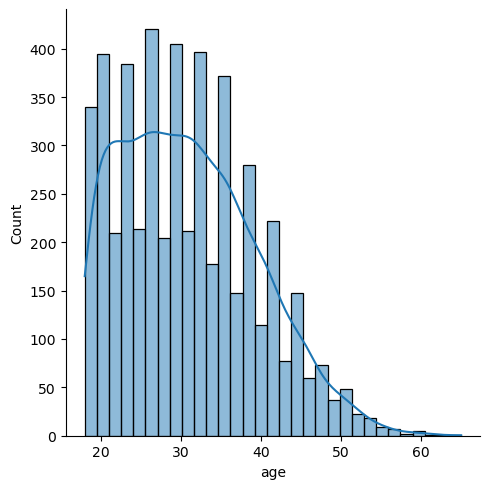

In [13]:
sns.displot(data['age'], kde=True, palette='Blues')

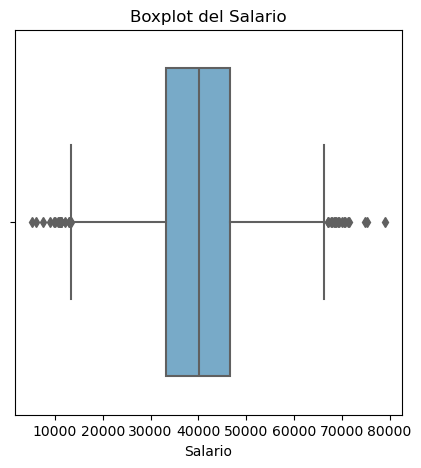

In [14]:
# Salary
plt.figure(figsize = (5,5))
sns.boxplot(x=data['salary'], palette='Blues')

plt.title("Boxplot del Salario")
plt.xlabel("Salario")
plt.show()

In [15]:
paleta = 'Blues'

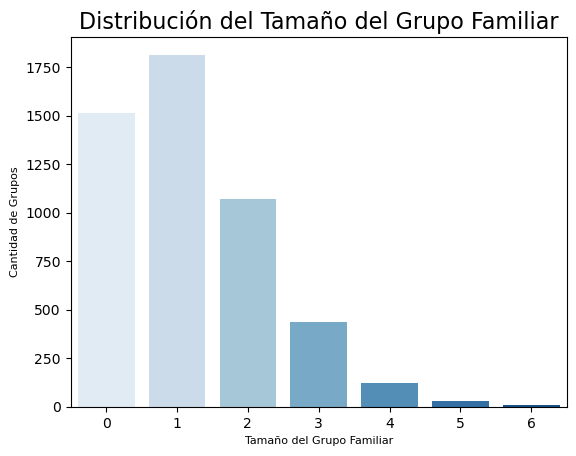

In [16]:
#Family members
sns.countplot(x=data['family_members'], palette='Blues')
plt.title("Distribución del Tamaño del Grupo Familiar", fontsize=16)
plt.xlabel("Tamaño del Grupo Familiar", fontsize=8)
plt.ylabel("Cantidad de Grupos", fontsize=8)
plt.show()

<Axes: xlabel='insurance_benefits', ylabel='count'>

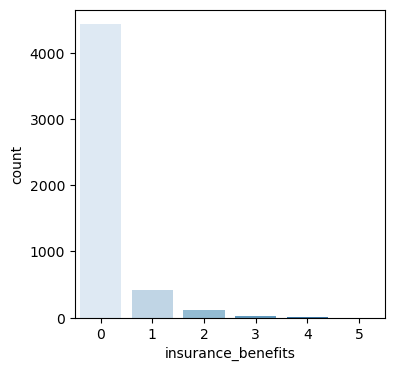

In [17]:
# Insurance benefits
plt.figure(figsize = (4,4))
sns.countplot(x='insurance_benefits', data=data, palette='Blues')

In [18]:
data.columns

Index(['gender', 'age', 'salary', 'family_members', 'insurance_benefits',
       'age_cat'],
      dtype='object')

# **Combinaciones**

In [20]:
# Gender / Insurance benefits
data_gender_b = data.groupby(['gender', 'insurance_benefits']).size().reset_index(name = 'Count')
data_gender_b

,gender,insurance_benefits,Count
0,0,0,2221
1,0,1,225
2,0,2,46
3,0,3,10
4,0,4,3
5,1,0,2215
6,1,1,198
7,1,2,69
8,1,3,8
9,1,4,4


In [21]:
data_gender_b['gender'] = data_gender_b['gender'].astype(str)

<Axes: xlabel='insurance_benefits', ylabel='Count'>

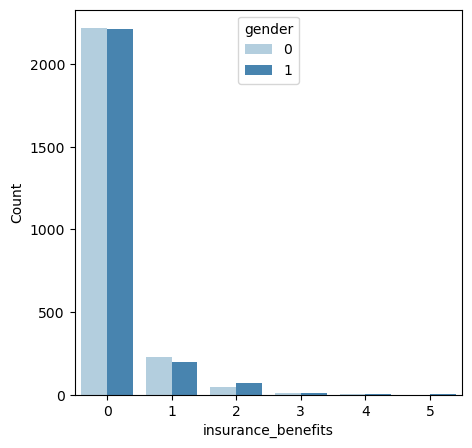

In [22]:
#Gráfica:
plt.figure(figsize = (5,5))
sns.barplot(x= 'insurance_benefits', y='Count', hue = 'gender',data = data_gender_b, palette = paleta)

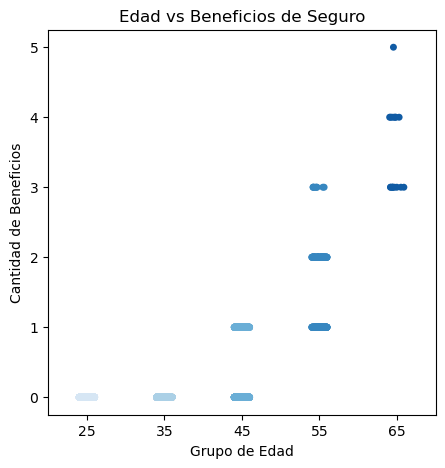

In [23]:
# age_cut / Insurance benefits
plt.figure(figsize=(5,5))
sns.stripplot(x='age_cat', y='insurance_benefits', data=data, jitter=True, palette="Blues")
plt.title('Edad vs Beneficios de Seguro')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Beneficios')
plt.show()

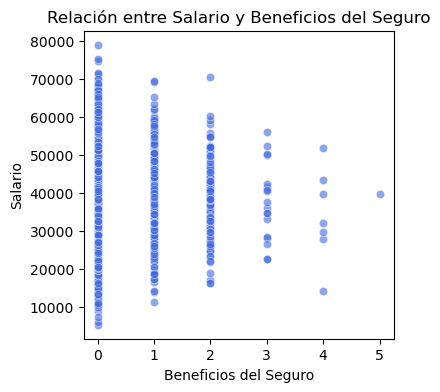

In [24]:
# salary / Insurance benefits
plt.figure(figsize=(4, 4))
sns.scatterplot(x='insurance_benefits', y='salary', data=data, alpha=0.6, color='royalblue')
plt.title('Relación entre Salario y Beneficios del Seguro')
plt.ylabel('Salario')
plt.xlabel('Beneficios del Seguro')
plt.show()

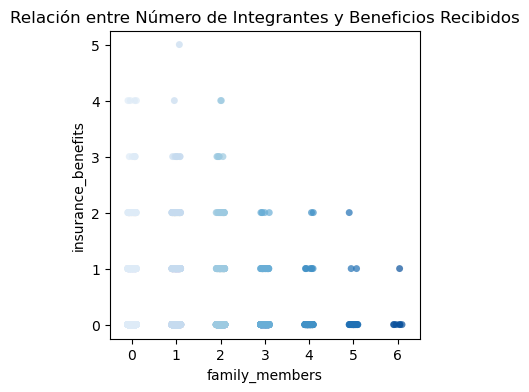

In [25]:
# family_members / Insurance benefits
plt.figure(figsize=(4, 4))
sns.stripplot(x='family_members', y='insurance_benefits', data=data, jitter=True, alpha=0.7, palette='Blues', edgecolor='black')
plt.title('Relación entre Número de Integrantes y Beneficios Recibidos')
plt.show()

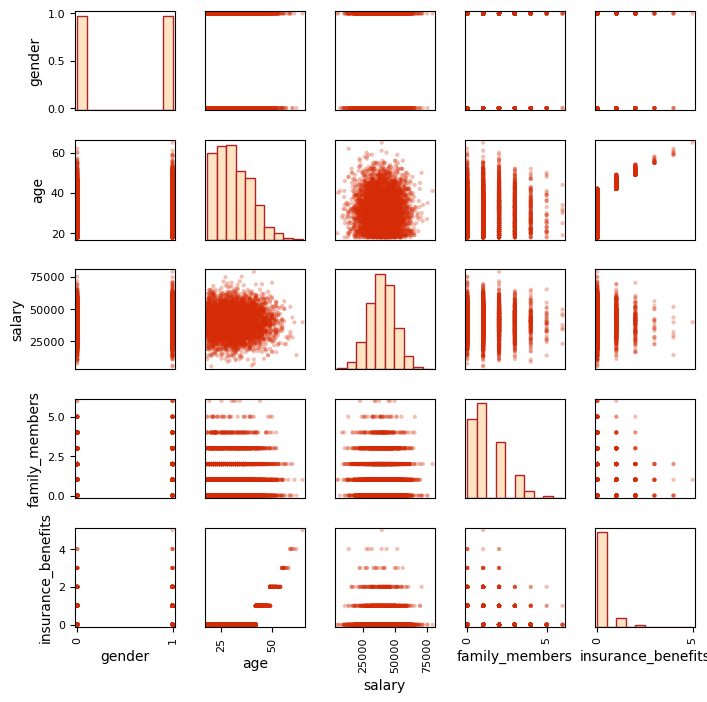

In [26]:
scatter_matrix(data, figsize = (8, 8), color = "#D52B06", alpha = 0.3, hist_kwds = {'color':['bisque'], 'edgecolor': 'firebrick'})
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# **Preparación de Datos para Modelado:**

In [27]:
#Características y objetivo:
x = data.drop('insurance_benefits', axis = 1)
y = data['insurance_benefits']

In [28]:
#Entrenamiento y prueba:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

# **Entrenamiento y Evaluación de Modelos:**

In [29]:
# Stochastic Gradient Descent
sgd = SGDClassifier(random_state = 42, class_weight='balanced')
sgd.fit(x_train, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

In [30]:
sgd.predict([[1, 1, 65, 20000, 1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [31]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd,x_train,y_train,cv=3,scoring="accuracy") 

array([0.0029985 , 0.88372093, 0.00375094])

In [32]:
#Matriz de Confusión:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd,x_train,y_train,cv=3) 

In [33]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train,y_train_pred) 

array([[1178,    0,    0, 2367,    0],
       [ 115,    0,    0,  230,    0],
       [  31,    0,    0,   61,    0],
       [   4,    0,    0,    9,    0],
       [   0,    0,    0,    5,    0]], dtype=int64)

In [34]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(random_state = 42, class_weight = 'balanced') 
rfc.fit(x_train,y_train) 
y_train_pred = cross_val_predict(rfc,x_train,y_train,cv=3)

In [35]:
#Matriz de Confusión:
confusion_matrix(y_train,y_train_pred)

array([[3545,    0,    0,    0,    0],
       [   0,  342,    3,    0,    0],
       [   0,    1,   91,    0,    0],
       [   0,    0,    1,   12,    0],
       [   0,    0,    0,    1,    4]], dtype=int64)

In [36]:
f1 = f1_score(y_train, y_train_pred, average="weighted")
recall = recall_score(y_train, y_train_pred, average="weighted")
precision = precision_score(y_train, y_train_pred, average="weighted")

In [37]:
f1, recall, precision

(0.9984946843607069, 0.9985, 0.9985301212214209)

In [38]:
#Regresión Logística
clf = LogisticRegression(class_weight='balanced', solver = 'lbfgs', multi_class = 'ovr', max_iter = 5000) 
clf.fit(x_train,y_train) 
y_pred_clf = cross_val_predict(clf, x_train, y_train, cv= 3)

In [39]:
#Matriz de Confusión:
confusion_matrix(y_train,y_pred_clf)

array([[2649,  708,   44,  106,   38],
       [  43,  173,   34,   78,   17],
       [   2,   45,   16,   21,    8],
       [   0,    3,    4,    4,    2],
       [   0,    2,    1,    2,    0]], dtype=int64)

In [40]:
f1 = f1_score(y_train, y_pred_clf, average="weighted")
recall = recall_score(y_train, y_pred_clf, average="weighted")
precision = precision_score(y_train, y_pred_clf, average="weighted")

In [41]:
f1, recall, precision

(0.7799379562136131, 0.7105, 0.8912521739541955)

In [42]:
#Decisión Tree Classifier
dtc = DecisionTreeClassifier(random_state = 45, class_weight='balanced', max_depth = 3)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=45)

In [43]:
y_train_dtc = cross_val_predict(dtc,x_train,y_train,cv=3)

In [44]:
#Matriz de Confusión
confusion_matrix(y_train,y_train_dtc) 

array([[3514,   31,    0,    0,    0],
       [   0,  340,    5,    0,    0],
       [   0,   31,   61,    0,    0],
       [   0,    0,    0,   13,    0],
       [   0,    0,    0,    0,    5]], dtype=int64)

In [50]:
f1 = f1_score(y_train, y_train_dtc, average="weighted")
recall = recall_score(y_train, y_train_dtc, average="weighted")
precision = precision_score(y_train, y_train_dtc, average="weighted")

In [51]:
f1, recall, precision

(0.9831315326128842, 0.98325, 0.9849553369516056)

In [45]:
#Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
y_train_gb_clf = cross_val_predict(gb_clf,x_train,y_train,cv=3)

In [47]:
#Matriz de Confusión:
confusion_matrix(y_train,y_train_gb_clf)

array([[3545,    0,    0,    0,    0],
       [   0,  343,    2,    0,    0],
       [   0,    1,   91,    0,    0],
       [   0,    0,    0,   13,    0],
       [   0,    0,    0,    0,    5]], dtype=int64)

In [52]:
f1 = f1_score(y_train, y_train_gb_clf, average="weighted")
recall = recall_score(y_train, y_train_gb_clf, average="weighted")
precision = precision_score(y_train, y_train_gb_clf, average="weighted")

In [53]:
f1, recall, precision

(0.9992514827599733, 0.99925, 0.9992546495999)

# **Evaluación de desempeño de modelo:**

In [49]:
modelos = {
    "Stochastic Gradient Descent": sgd,
    "Random Forest": rfc,
    "Decision Tree": dtc,
    "Gradient Boosting": gb_clf,
    "Logistic Regression": clf
}

for nombre, modelo in modelos.items():
    print(f"\n Evaluando modelo: {nombre}")
    
    y_pred = modelo.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print("""
    """)


 Evaluando modelo: Stochastic Gradient Descent
 Accuracy: 0.0020
Matriz de confusión:
[[  0   0   0   0 891   0]
 [  0   0   0   0  78   0]
 [  0   0   0   0  23   0]
 [  0   0   0   0   5   0]
 [  0   0   0   0   2   0]
 [  0   0   0   0   1   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       891
           1       0.00      0.00      0.00        78
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         5
           4       0.00      1.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.00      1000
   macro avg       0.00      0.17      0.00      1000
weighted avg       0.00      0.00      0.00      1000


    

 Evaluando modelo: Random Forest
 Accuracy: 0.9990
Matriz de confusión:
[[891   0   0   0   0   0]
 [  0  78   0   0   0   0]
 [  0   0  23   0   0   0]
 [  0   0   0   5   0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

 Accuracy: 0.9900
Matriz de confusión:
[[885   6   0   0   0   0]
 [  0  75   3   0   0   0]
 [  0   0  23   0   0   0]
 [  0   0   0   5   0   0]
 [  0   0   0   0   2   0]
 [  0   0   0   0   1   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       891
           1       0.93      0.96      0.94        78
           2       0.88      1.00      0.94        23
           3       1.00      1.00      1.00         5
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.99      1000
   macro avg       0.75      0.83      0.78      1000
weighted avg       0.99      0.99      0.99      1000


    

 Evaluando modelo: Gradient Boosting
 Accuracy: 0.9990
Matriz de confusión:
[[891   0   0   0   0   0]
 [  0  78   0   0   0   0]
 [  0   0  23   0   0   0]
 [  0   0   0   5   0   0]
 [  0   0   0   0   2   0]
 [  0   0  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

**Modelo seleccionado: Gradient Boosting**

Se ha elegido **Gradient Boosting** como el modelo final, ya que ha demostrado ofrecer los mejores resultados en términos de precisión y equilibrio entre sesgo y varianza. A diferencia de modelos más simples como Decision Tree, que tienden a sobreajustarse, o Logistic Regression, que presentó un menor desempeño en la clasificación multiclase, **Gradient Boosting** mejora el aprendizaje iterativamente, reduciendo el error en cada paso.
Además, las métricas de evaluación como F1-score, accuracy y la matriz de confusión indican que este modelo generaliza bien sin caer en sobreajuste, lo que lo hace la mejor opción para nuestro problema.